In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time as tm

In [2]:
radius = np.loadtxt('bubble_radius.csv',delimiter=',' ,skiprows = 1)[:, 1]
r_time = np.loadtxt('bubble_radius.csv',delimiter=',' ,skiprows = 1)[:, 0]

def fifth_order_fit(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x**1 + f

def exp_fit(x, a, b, c,):
    return a*np.exp(-c*x)+b 

bound=( [-9.680-1, 11.13-1, 3.038-1], [-9.680+1,  11.13+1, 3.038+1 ])
popt, pcov = curve_fit(fifth_order_fit, r_time, radius)

popt_exp, pcov_exp = curve_fit(exp_fit, r_time, radius, bounds = bound)

print(popt)
print(popt_exp)
print("poly error: ",np.sqrt(np.diag(pcov)))
print("exp error: ",np.sqrt(np.diag(pcov_exp)))

[ 169.24753967 -329.29356926  242.37827196  -98.68736477   34.85360729
    1.32661027]
[-9.67849251 11.11553804  3.05268982]
poly error:  [5.48779198e+01 9.36987449e+01 5.76979541e+01 1.54196368e+01
 1.68025203e+00 5.60108081e-02]
exp error:  [0.05882658 0.0712978  0.05446064]


In [3]:

r_mcsigma = np.std(np.abs(np.load("r_mc.npy"))*10, axis=1)
z_mcsigma = np.std(np.load("z_0.05mc.npy")*10, axis=1)
z_mcmean = np.mean(np.load("z_0.05mc.npy")*10, axis=1)
t_mc = np.linspace(0, 3, len(z_mcmean))

r_007mcsigma = np.std(np.abs(np.load("r_0.07mc.npy"))*10, axis=1)
z_007mcsigma = np.std(np.load("z_0.07mc.npy")*10, axis=1)
z_007mcmean = np.mean(np.load("z_0.07mc.npy")*10, axis=1)
#t_mc = np.linspace(0, 3, len(z_mcmean))


r_009mcsigma = np.std(np.abs(np.load("r_0.09mc.npy"))*10, axis=1)
z_009mcsigma = np.std(np.load("z_0.09mc.npy")*10, axis=1)
z_009mcmean = np.mean(np.load("z_0.09mc.npy")*10, axis=1)

In [4]:
r_008mcsigma = np.std(np.abs(np.load("r_0.08mc.npy"))*10, axis=1)
z_008mcsigma = np.std(np.load("z_0.08mc.npy")*10, axis=1)
z_008mcmean = np.mean(np.load("z_0.08mc.npy")*10, axis=1)

fit abc -9.678492511467383 11.115538040722548 3.0526898175740893
fit std [0.05882658 0.0712978  0.05446064]


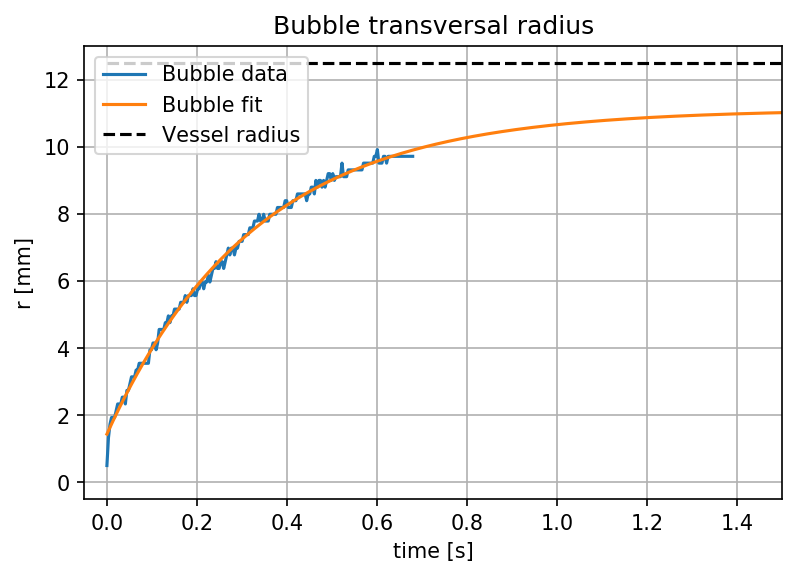

In [6]:
a, b, c, d, e, f = popt
a1, b1, c1  = popt_exp
time = np.linspace(0, 1.5, 1000)
r_fit = fifth_order_fit(time, a, b, c, d, e, f)

plt.figure(dpi=150)
plt.plot(r_time, radius, label = 'Bubble data')
#plt.plot(time, r_fit)
plt.plot(time, exp_fit(time,a1, b1, c1), label = 'Bubble fit')
#plt.plot(t_mc, r_mcsigma, label=r'1 $\sigma$ $e^-$ (0.05V/cm)')
#plt.plot(t_mc, r_007mcsigma, label=r'1 $\sigma$ $e^-$ (0.07V/cm)')
#plt.plot(t_mc, r_009mcsigma, label=r'1 $\sigma$ $e^-$ (0.09V/cm)')

plt.hlines(12.5, 0, 3, linestyles = 'dashed', label = 'Vessel radius' )

plt.title('Bubble transversal radius')
plt.ylabel('r [mm]')
plt.xlabel('time [s]')
plt.legend()
plt.grid()
plt.ylim(-0.5, 13)
plt.xlim(-0.05, 1.5)
perr = np.sqrt(np.diag(pcov_exp))
print('fit abc', a1, b1, c1)
print('fit std', perr)

/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


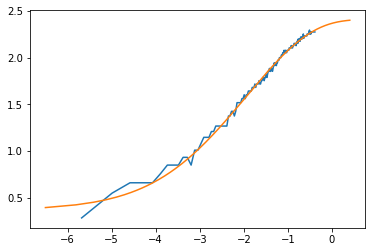

In [6]:
plt.plot(np.log(r_time), np.log(radius), label = 'Bubble fit')
plt.plot(np.log(time), np.log(exp_fit(time,a1, b1, c1)), label = 'Bubble fit')
#plt.yscale('log')
#plt.xscale('log')

The radius is manually taken from the animation of the bubble motion using Logger pro video analysis. The diffusion of the electron is expaned across the vessel quickly.

In [7]:
def bubble():
    pos_data = np.loadtxt('pos_time.txt', skiprows=5)

    time = pos_data[0:464, 0]
    pos = pos_data[0:464,1]/pos_data[0:464, 2]

    yax = np.loadtxt('zaxis_time.txt')

    zpos = yax[:, 0]

    low = []
    high = []

    rever = yax[::-1]

    i = 1
    while i < 465:
        low_idx = np.argmax(yax[:, i]>0.4)
        high_idx = len(yax[:, 0]) - np.argmax(rever[:, i]>0.4)-1

        low = np.append(low, zpos[low_idx])
        high = np.append(high, zpos[high_idx])
        i = i+1

#    plt.figure(dpi=200)

    return low, high, time

#    plt.plot(time, 0.5*(low+high), label='Bubble')
#    plt.fill_between(time, low, high, alpha=0.3)

#    pos_func2 = CubicSpline(time, 0.5*(low+high))
#    plt.grid()
#    plt.title('position')
#    plt.ylabel('z[mm]')
#    plt.xlabel('time[s]')
low, high, ztime  = bubble()

lower_bounds = [-0.001, -0.1, -1, -1000, -1000, 0]
higher_bounds = [0.01, 0.01, 40, 1000, 1000, 3]
popt_zlow, pcov_zlow = curve_fit(fifth_order_fit, ztime, low, bounds = (lower_bounds, higher_bounds))
popt_zhigh, pcov_zhigh = curve_fit(fifth_order_fit, ztime, high, bounds = (lower_bounds, higher_bounds))
print(popt_zlow)
print(popt_zhigh)
print('low error', np.sqrt(np.diag(pcov_zlow)))
print('high error', np.sqrt(np.diag(pcov_zhigh)))

[1.00000000e-02 1.00000000e-02 4.00000000e+01 8.74354151e+01
 1.22866722e+02 2.68055993e-13]
[1.00000000e-02 1.00000000e-02 3.13588141e+01 1.07718305e+02
 1.23770666e+02 2.05932016e+00]
low error [8.85082860e+01 1.54454521e+02 9.72666879e+01 2.66113459e+01
 2.97452085e+00 1.01851348e-01]
high error [5.68531451e+01 9.92135776e+01 6.24791657e+01 1.70938172e+01
 1.91068589e+00 6.54232836e-02]


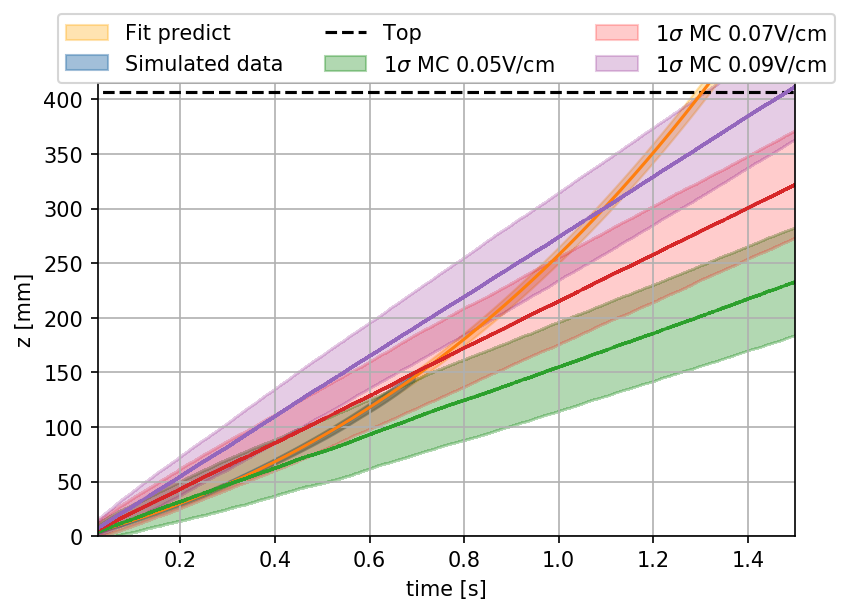

In [8]:
plt.figure(dpi=150)
#plt.plot(ztime, 0.5*(low+high), label='Bubble data')


zfit_low = fifth_order_fit(time, popt_zlow[0],popt_zlow[1],popt_zlow[2],popt_zlow[3], popt_zlow[4], popt_zlow[5] )
zfit_high = fifth_order_fit(time, popt_zhigh[0],popt_zhigh[1],popt_zhigh[2],popt_zhigh[3], popt_zhigh[4], popt_zhigh[5] )
plt.fill_between(time, zfit_low, zfit_high, alpha=0.3,  label='Fit predict', color='orange')
plt.plot(ztime, 0.5*(low + high))
plt.plot(time, 0.5*(zfit_low + zfit_high))
plt.fill_between(ztime, low, high, alpha=0.5,  label='Simulated data', color='steelblue')
plt.hlines(407, 0, 3, linestyles = 'dashed', label = 'Top' )


plt.plot(t_mc, z_mcmean)
plt.fill_between(t_mc, z_mcmean-z_mcsigma, z_mcmean+z_mcsigma, alpha=0.3,  label=r'$1\sigma$ MC 0.05V/cm',color='green')

#plt.plot(t_mc, z_008mcmean)
#plt.fill_between(t_mc, z_008mcmean-z_008mcsigma, z_008mcmean+z_008mcsigma, alpha=0.2,  label=r'$1\sigma$ MC 0.08V/cm',color='green')
plt.plot(t_mc, z_007mcmean)
plt.fill_between(t_mc, z_007mcmean-z_007mcsigma, z_007mcmean+z_007mcsigma, alpha=0.2,  label=r'$1\sigma$ MC 0.07V/cm',color='red')
plt.plot(t_mc, z_009mcmean)
plt.fill_between(t_mc, z_009mcmean-z_009mcsigma, z_009mcmean+z_009mcsigma, alpha=0.2,  label=r'$1\sigma$ MC 0.09V/cm', color='purple')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.175),
          ncol=3, fancybox=True)
plt.ylabel('z [mm]')
plt.xlabel('time [s]')
plt.ylim(0, 415)
plt.xlim(0.025, 1.5)
plt.grid()


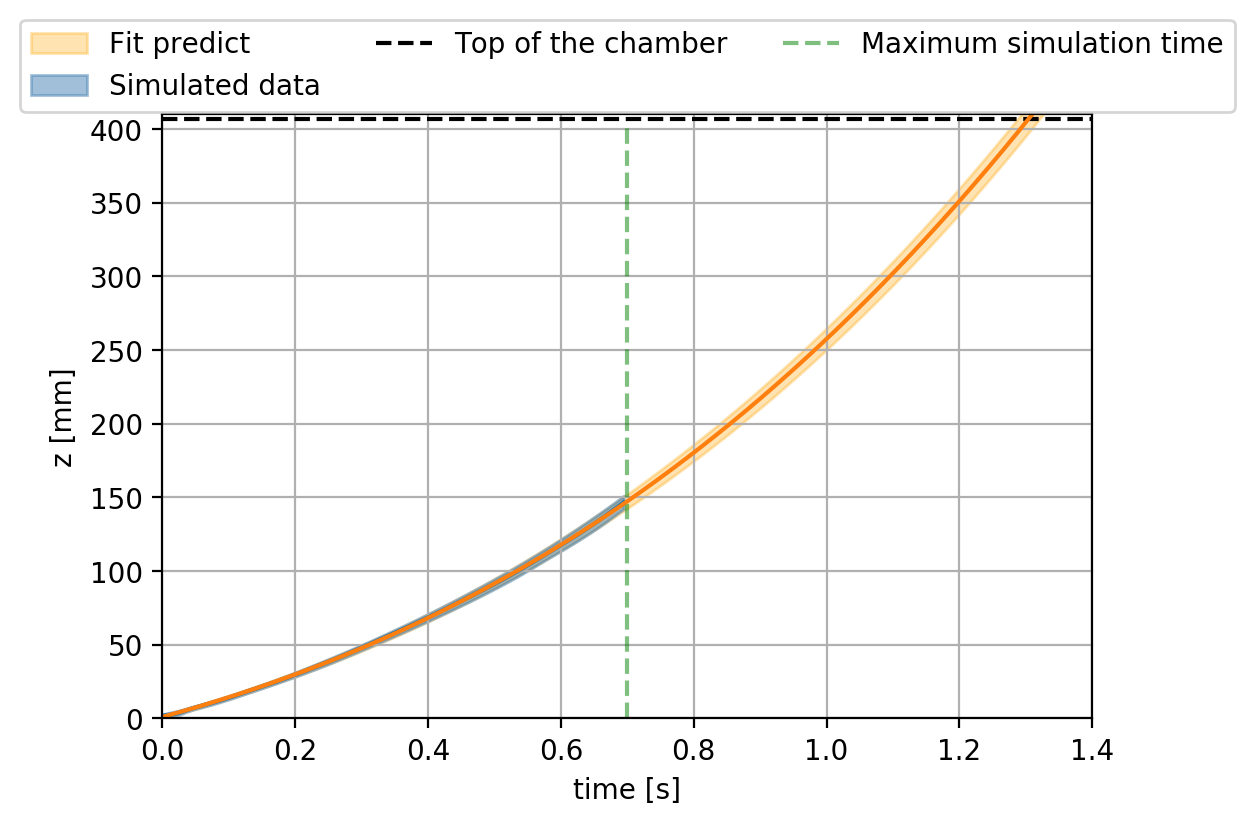

In [30]:
plt.figure(dpi=200)
zfit_low = fifth_order_fit(time, popt_zlow[0],popt_zlow[1],popt_zlow[2],popt_zlow[3], popt_zlow[4], popt_zlow[5] )
zfit_high = fifth_order_fit(time, popt_zhigh[0],popt_zhigh[1],popt_zhigh[2],popt_zhigh[3], popt_zhigh[4], popt_zhigh[5] )
plt.fill_between(time, zfit_low, zfit_high, alpha=0.3,  label='Fit predict', color='orange')
plt.plot(ztime, 0.5*(low + high))
plt.plot(time, 0.5*(zfit_low + zfit_high))
plt.fill_between(ztime, low, high, alpha=0.5,  label='Simulated data', color='steelblue')
plt.hlines(407, 0, 1.5, linestyles = 'dashed', label = 'Top of the chamber' )
plt.xlabel('time [s]')
plt.ylabel('z [mm]')
#plt.plot(t_mc, z_009mcmean)
#plt.fill_between(t_mc, z_009mcmean-z_009mcsigma, z_009mcmean+z_009mcsigma, alpha=0.3,  label=r'$1\sigma$ MC 0.09V/cm', color='green')
plt.vlines(0.7, 0, 405, linestyles = 'dashed', label = 'Maximum simulation time', alpha = 0.5, color = 'green')
plt.xlim(0, 1.4)
plt.ylim(0, 410)
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18),
          ncol=3, fancybox=True)



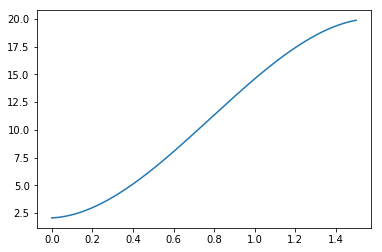

In [10]:
plt.plot(time, zfit_high-zfit_low)

I defined an alternating electric field by a sine function, which defined as 

$$
E(t) = E_{max}\sin\left(\omega(t+\phi)\right)+E_{shift}
$$

Where $E_{max}$ is the maximum E field, in this case, it is $50V/cm$. The $\omega$ ($10Hz$) is frequancy, $\phi$ is an randon phase for each event, $E_{shift}$ ($0.05V/cm$) is the Electri field drive the electron moving upward.

In [11]:
def signal(pos):
    zmc = np.load("z_mc.npy")*10
    row_lens = len(zmc[1, :])
    col_lens = len(zmc[:, 1])
    time = np.linspace(0, 3,col_lens)
    i = 0
    t_arr = []
    while i < row_lens:
        idx = np.argmax(zmc[:, i]>pos)
        if time[idx] !=0:
            t_arr = np.append(t_arr, time[idx])
        i = i+1
    return t_arr
    
ts400 = signal(400)
ts300 = signal(300)
ts250 = signal(250)
ts200 = signal(200)


Text(0,0.5,'counts')

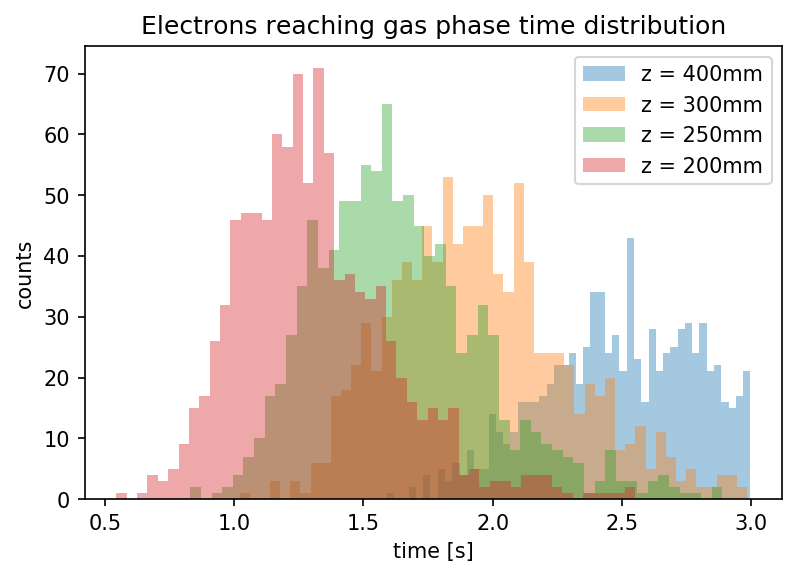

In [12]:
plt.figure(dpi=150)
plt.hist(ts400, bins = 50, alpha = 0.4, label = 'z = 400mm')
plt.hist(ts300, bins = 50, alpha = 0.4, label = 'z = 300mm')
plt.hist(ts250, bins = 50, alpha = 0.4, label = 'z = 250mm')
plt.hist(ts200, bins = 50, alpha = 0.4, label = 'z = 200mm')
plt.legend()
plt.title('Electrons reaching gas phase time distribution')
plt.xlabel('time [s]')
plt.ylabel('counts')

Approximate the bubble as a half ellipse
$$
\frac{r^2}{a^2} + \frac{z^2}{b^2} = 1
$$
So the bubble region is approximately defined to be:
$$z_{low}< z < b\sqrt{1-\frac{r^2}{a^2}}+z_{low}$$
Where $b$ is the center thickness of the bubble, $a$ is the radius of bubble.

In [13]:
def zupper(time):
    return fifth_order_fit(time, popt_zhigh[0],popt_zhigh[1],popt_zhigh[2],popt_zhigh[3], popt_zhigh[4], popt_zhigh[5] )

def zlower(time):
    return fifth_order_fit(time, popt_zlow[0],popt_zlow[1],popt_zlow[2],popt_zlow[3], popt_zlow[4], popt_zlow[5] )

def r_func(time):
    return exp_fit(time, popt_exp[0], popt_exp[1], popt_exp[2] )

def ellips(a, b, r):
    return b*np.sqrt(1-r**2/a**2)

def posbility(zfile, rfiles):
    start = tm.time()
    z_mc = np.load(zfile)*10+2
    r_mc = np.load(rfiles)*10
    t = np.linspace(0, 1.5, 60000)
    i = 0
    posbi = []
    r_test = []
    while i<60000:
        zt = z_mc[i, :]
        rt = r_mc[i, :]
        a = r_func(t[i])
        bup = zupper(t[i])
        blow = zlower(t[i])
        db = bup - blow
        inside = 0

        rindx = np.argwhere(rt < a)
        rindx = rindx.flatten()
        r_test = np.append(r_test, len(rindx)/len(rt))
        if len(rindx)!=0:
            rin = rt[rindx]
            zin1 = zt[rindx]
            belo_idx = np.argwhere(zin1 > blow)
            belo_idx = belo_idx.flatten()
            if len(belo_idx) !=0:
                zin1 = zin1[belo_idx]   ### filter out below bubble
                rin = rin[belo_idx]    
                above = ellips(a, db, rin) + blow
                abv_idx = np.argwhere(zin1 < above)
                abv_idx = abv_idx.flatten()
                zin1 = zin1[abv_idx]  ### filter out above bubble
                inside = len(zin1)
                #print(len(zin1))
        posbi = np.append(posbi, inside/len(rt))
        i = i+1
    end = tm.time()
    print('Run time ' ,end - start, ' s')
    return t, posbi

t_pos05, posbi05 = posbility('z_0.05mc.npy', 'r_0.05mc_abs.npy')  
t_pos09, posbi09 = posbility('z_0.09mc.npy', 'r_0.09mc_abs.npy')   
t_pos08, posbi08 = posbility('z_0.08mc.npy', 'r_0.08mc_abs.npy') 
t_pos07, posbi07 = posbility('z_0.07mc.npy', 'r_0.07mc_abs.npy')

Run time  33.63063144683838  s
Run time  24.897243976593018  s
Run time  24.27736186981201  s
Run time  31.937084197998047  s


(0.04, 1.3)

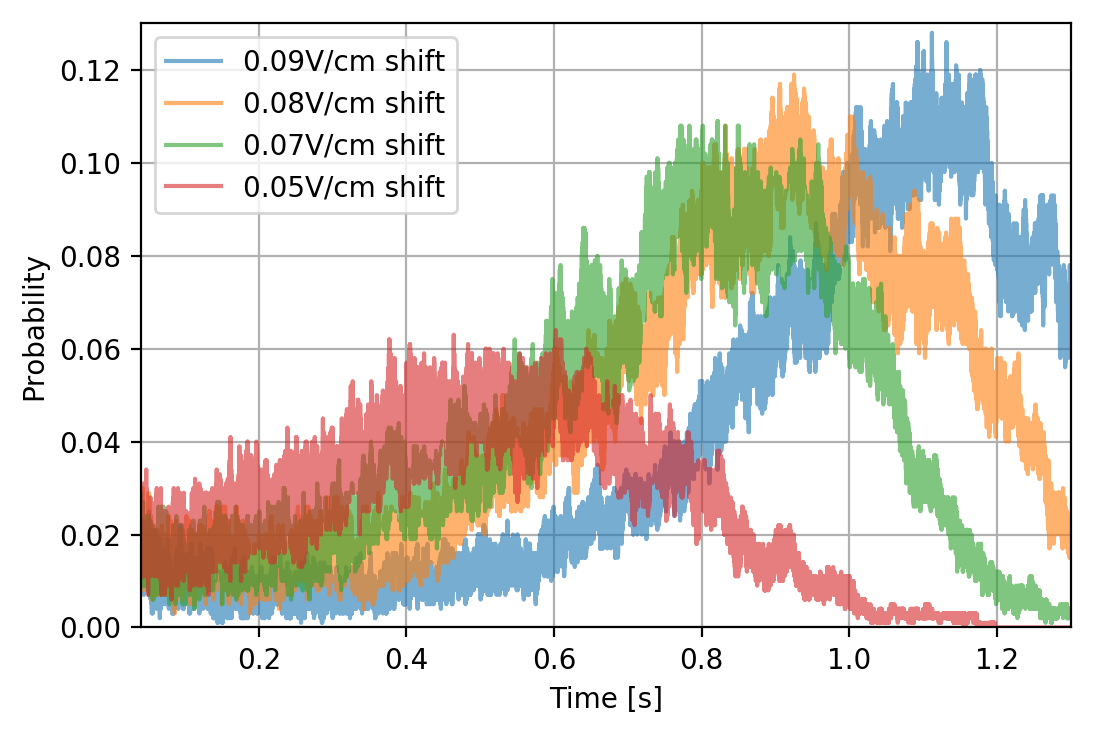

In [14]:
plt.figure(dpi = 200)
plt.plot(t_pos09, posbi09, alpha = 0.6, label='0.09V/cm shift')
plt.plot(t_pos08, posbi08, alpha = 0.6, label='0.08V/cm shift')
plt.plot(t_pos07, posbi07, alpha = 0.6, label='0.07V/cm shift')
plt.plot(t_pos05, posbi05, alpha = 0.6, label='0.05V/cm shift')
#plt.yscale('log')   

plt.ylabel('Probability')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()
plt.ylim(0, 0.13)
plt.xlim(0.04, 1.3)